# :basketball: 6 - Concat CSV's

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Predefined variables

In [2]:
CSV_DIR = "../results/"
CSV_MANUAL_DIR = CSV_DIR + "manual/"
MEDIA_DIR = "../media/"

BASE_CSV_PATH = CSV_DIR + "base_metrics.csv"
AUGMENTED_CSV_PATH = CSV_DIR + "augmented_metrics.csv"
COMBINED_CSV_PATH = CSV_DIR + "combined_metrics.csv"

BASE_CLASS_CSV_PATH = CSV_MANUAL_DIR + "base_class_metrics.csv"
AUGMENTED_CLASS_CSV_PATH = CSV_MANUAL_DIR + "augmented_class_metrics.csv"
COMBINED_CLASS_CSV_PATH = CSV_MANUAL_DIR + "combined_class_metrics.csv"

OUTPUT_NAME = "concat_metrics.csv"
OUTPUT_CLASS_NAME = "concat_class_metrics.csv"

PALETTE = "flare"

## Concat CSV's

In [3]:
base = pd.read_csv(BASE_CSV_PATH)
augmented = pd.read_csv(AUGMENTED_CSV_PATH)
combined = pd.read_csv(COMBINED_CSV_PATH)

concat = pd.concat([base, augmented, combined], ignore_index=True)
concat.to_csv(CSV_DIR + OUTPUT_NAME, index=False, mode='w')

print(f"Concatenated CSV saved to {CSV_DIR + OUTPUT_NAME}")

Concatenated CSV saved to ../results/concat_metrics.csv


In [4]:
base_class = pd.read_csv(BASE_CLASS_CSV_PATH)
augmented_class = pd.read_csv(AUGMENTED_CLASS_CSV_PATH)
combined_class = pd.read_csv(COMBINED_CLASS_CSV_PATH)

concat_class = pd.concat([base_class, augmented_class, combined_class], ignore_index=True)
concat_class.to_csv(CSV_MANUAL_DIR + OUTPUT_CLASS_NAME, index=False, mode='w')

print(f"Concatenated class CSV saved to {CSV_DIR + OUTPUT_CLASS_NAME}")

Concatenated class CSV saved to ../results/concat_class_metrics.csv


## Visualizations

In [14]:
df = pd.read_csv(CSV_DIR + OUTPUT_NAME)
df

,Dataset,mAP50,mAP50-95,Precision,Recall,Fitness,Preprocess_ms,Inference_ms,Postprocess_ms
0,base,0.796522,0.492862,0.846422,0.766424,0.492862,2.505212,14.817640,0.674512
1,geometric,0.817500,0.509871,0.883052,0.756142,0.509871,6.580292,21.202828,2.628072
2,color,0.825424,0.514040,0.893439,0.761626,0.514040,4.632812,14.171652,7.045772
3,kernel,0.830225,0.522289,0.844574,0.795967,0.522289,3.365828,16.027684,1.515616
4,combined,0.832441,0.521009,0.849624,0.824090,0.521009,3.517272,19.465480,1.933252


In [5]:
df_class = pd.read_csv(CSV_MANUAL_DIR + OUTPUT_CLASS_NAME)
df_class

,Dataset,Class,mAP50,mAP50-95,Precision,Recall
0,base,Ball,0.328,0.176,0.959,0.250
1,base,Hoop,0.891,0.617,0.940,0.875
2,base,Period,0.870,0.484,1.000,0.696
3,base,Player,0.855,0.576,0.855,0.852
4,base,Ref,0.802,0.511,0.681,0.787
5,base,Shot Clock,0.703,0.399,0.690,0.742
6,base,Team Name,0.886,0.547,0.825,0.917
7,base,Team Points,0.907,0.607,0.755,0.890
8,base,Time Remaining,0.928,0.519,0.913,0.889
9,geometric,Ball,0.326,0.195,0.782,0.200


In [11]:
sns.set_style("darkgrid")

### Performance comparison

#### General

##### mAP50

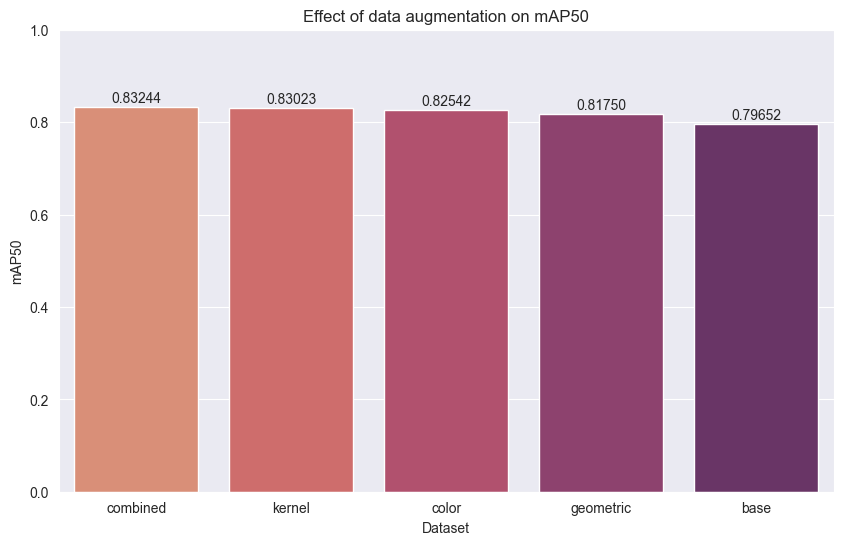

In [13]:
df_sorted = df.sort_values(by="mAP50", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="mAP50", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["mAP50"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on mAP50")
plt.xlabel("Dataset")
plt.ylabel("mAP50")
plt.ylim(0, 1)
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="mAP50", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["mAP50"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on mAP50")
plt.xlabel("Dataset")
plt.ylabel("mAP50")
plt.ylim(0, 1)
plt.savefig(f"{MEDIA_DIR}06-concat-mAP50.png")
plt.close()

##### mAP50-95

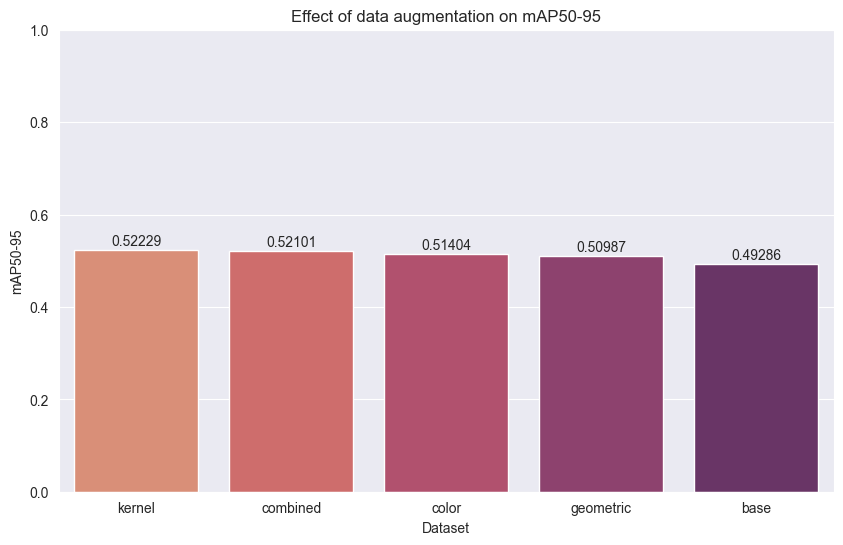

In [ ]:
df_sorted = df.sort_values(by="mAP50-95", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="mAP50-95", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["mAP50-95"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on mAP50-95")
plt.xlabel("Dataset")
plt.ylabel("mAP50-95")
plt.ylim(0, 1)
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="mAP50-95", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["mAP50-95"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on mAP50-95")
plt.xlabel("Dataset")
plt.ylabel("mAP50-95")
plt.ylim(0, 1)
plt.savefig(f"{MEDIA_DIR}06-concat-mAP50-95.png")
plt.close()

##### Precision

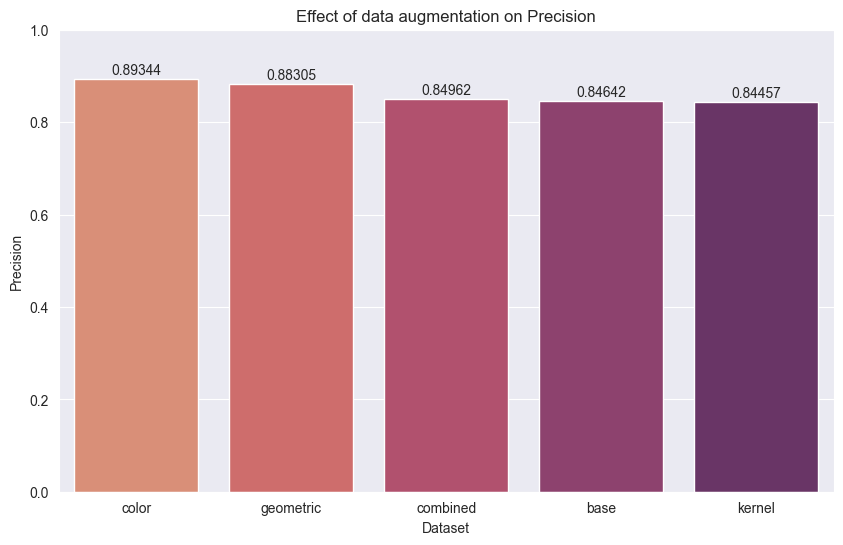

In [ ]:
df_sorted = df.sort_values(by="Precision", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="Precision", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["Precision"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on Precision")
plt.xlabel("Dataset")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="Precision", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["Precision"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on Precision")
plt.xlabel("Dataset")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.savefig(f"{MEDIA_DIR}06-concat-Precision.png")
plt.close()

##### Recall

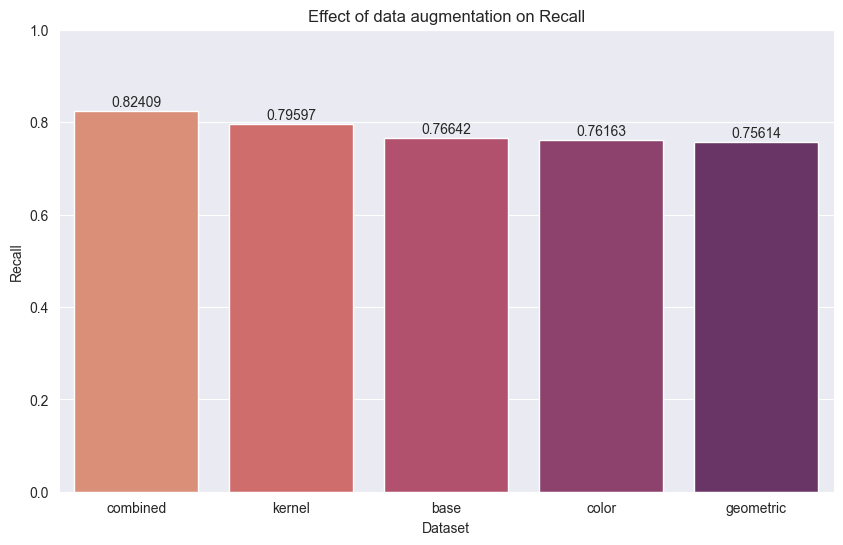

In [29]:
df_sorted = df.sort_values(by="Recall", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="Recall", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["Recall"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on Recall")
plt.xlabel("Dataset")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="Recall", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["Recall"]):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on Recall")
plt.xlabel("Dataset")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.savefig(f"{MEDIA_DIR}06-concat-Recall.png")
plt.close()

##### Precision vs recall

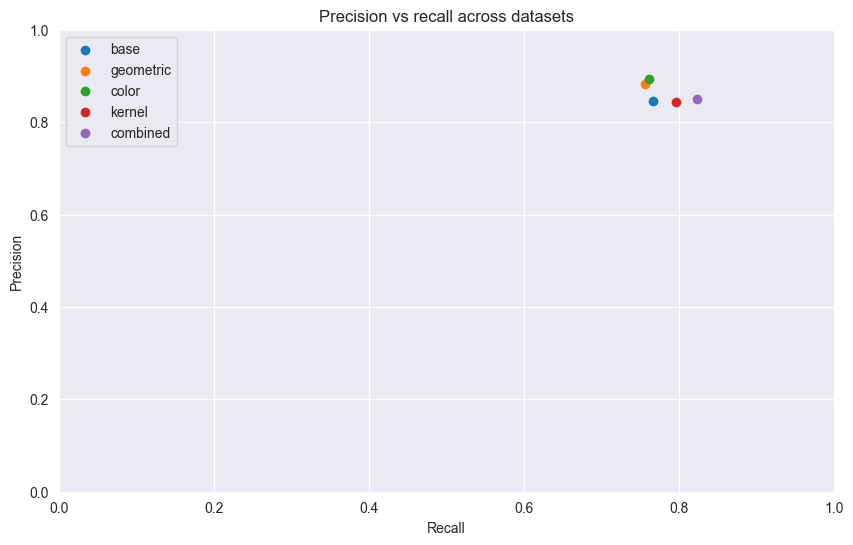

In [26]:
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.scatter(row['Recall'], row['Precision'], label=row['Dataset'])
plt.title('Precision vs recall across datasets')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.scatter(row['Recall'], row['Precision'], label=row['Dataset'])
plt.title('Precision vs recall across datasets')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.savefig(f"{MEDIA_DIR}06-concat-precision-recall.png")
plt.close()

##### Inference speed

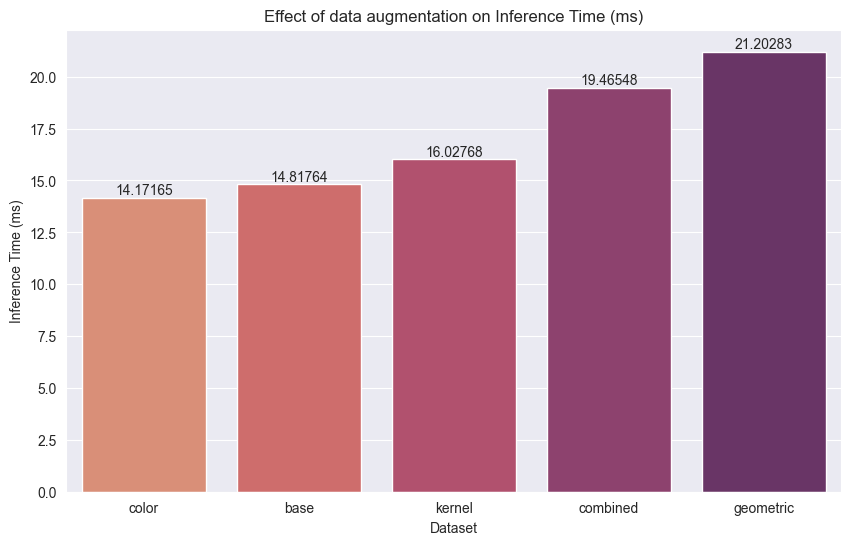

In [5]:
df_sorted = df.sort_values(by="Inference_ms", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="Inference_ms", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["Inference_ms"]):
    plt.text(i, v + 0.15, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on Inference Time (ms)")
plt.xlabel("Dataset")
plt.ylabel("Inference Time (ms)")
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Dataset", y="Inference_ms", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_sorted["Inference_ms"]):
    plt.text(i, v + 0.15, f"{v:.5f}", ha='center')
plt.title("Effect of data augmentation on Inference Time (ms)")
plt.xlabel("Dataset")
plt.ylabel("Inference Time (ms)")
plt.savefig(f"{MEDIA_DIR}06-concat-Inference.png")
plt.close()

##### Inference speed vs accuracy

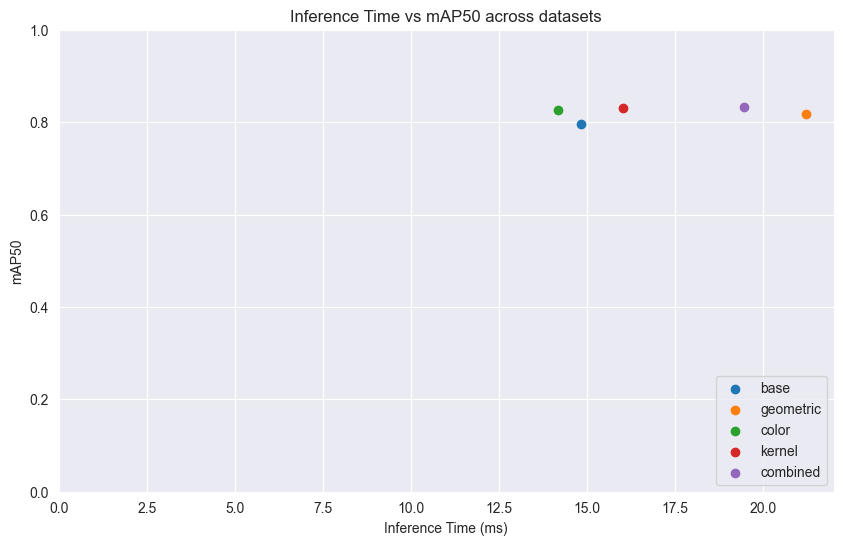

In [16]:
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.scatter(row['Inference_ms'], row['mAP50'], label=row['Dataset'])
plt.title('Inference Time vs mAP50 across datasets')
plt.xlabel('Inference Time (ms)')
plt.ylabel('mAP50')
plt.xlim(0, 22)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# Save this figure to media directory
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.scatter(row['Inference_ms'], row['mAP50'], label=row['Dataset'])
plt.title('Inference Time vs mAP50 across datasets')
plt.xlabel('Inference Time (ms)')
plt.ylabel('mAP50')
plt.xlim(0, 22)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.savefig(f"{MEDIA_DIR}06-concat-inference-accuracy.png")
plt.close()

#### Per class

##### mAP50

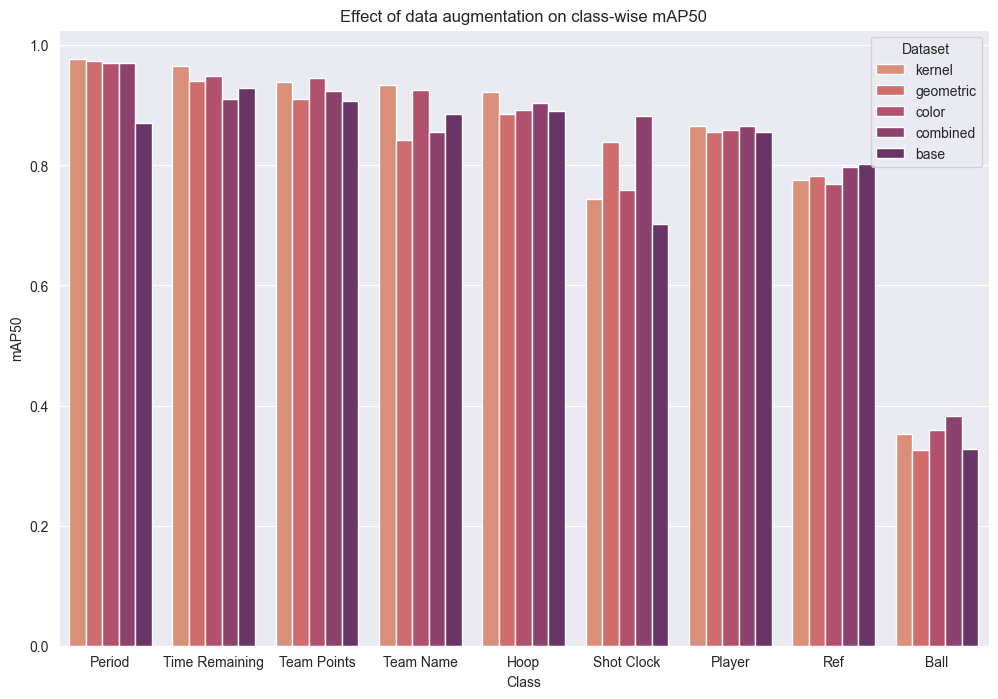

In [17]:
df_class_sorted = df_class.sort_values(by="mAP50", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_class_sorted, x="Class", y="mAP50", palette=PALETTE, hue="Dataset")
plt.title("Effect of data augmentation on class-wise mAP50")
plt.xlabel("Class")
plt.ylabel("mAP50")
plt.show()

# Save this figure to media directory
plt.figure(figsize=(12, 8))
sns.barplot(data=df_class_sorted, x="Class", y="mAP50", palette=PALETTE, hue="Dataset")
plt.title("Effect of data augmentation on class-wise mAP50")
plt.xlabel("Class")
plt.ylabel("mAP50")
plt.savefig(f"{MEDIA_DIR}06-concat-class-mAP50.png")
plt.close()

##### mAP50 with respect to base dataset

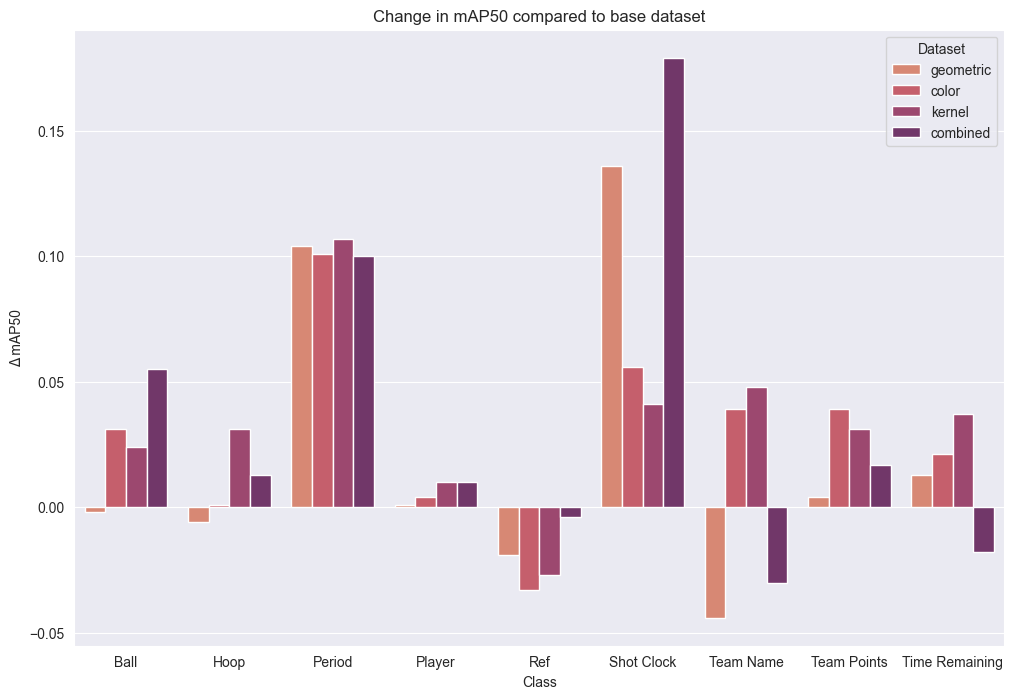

In [19]:
df_class_base = df_class[df_class['Dataset'] == 'base'][["Class", "mAP50"]]
df_class_base = df_class_base.rename(columns={"mAP50": "base_mAP50"})

df_delta = df_class.merge(df_class_base, on="Class")
df_delta['mAP50_delta'] = df_delta['mAP50'] - df_delta['base_mAP50']

df_delta = df_delta[df_delta['Dataset'] != 'base']

plt.figure(figsize=(12, 8))
sns.barplot(data=df_delta, x="Class", y="mAP50_delta", palette=PALETTE, hue="Dataset")
plt.title("Change in mAP50 compared to base dataset")
plt.xlabel("Class")
plt.ylabel("Δ mAP50")
plt.show()

# Save this figure to media directory
plt.figure(figsize=(12, 8))
sns.barplot(data=df_delta, x="Class", y="mAP50_delta", palette=PALETTE, hue="Dataset")
plt.title("Change in mAP50 compared to base dataset")
plt.xlabel("Class")
plt.ylabel("Δ mAP50")
plt.savefig(f"{MEDIA_DIR}06-concat-class-mAP50-delta.png")
plt.close()

##### Ball performance

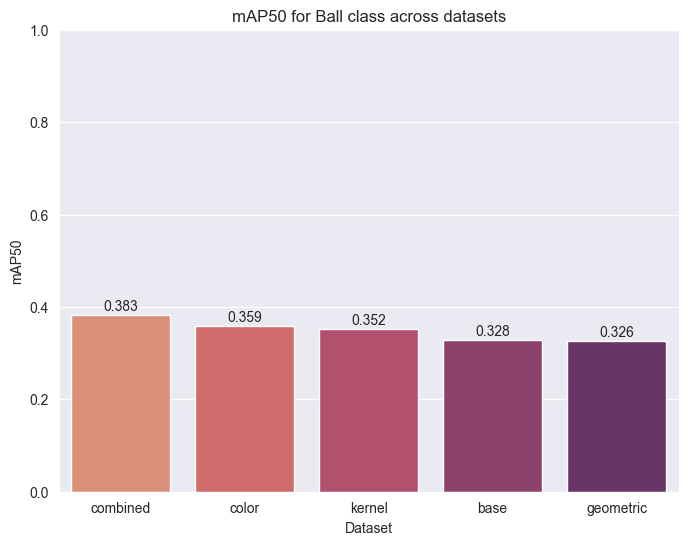

In [28]:
df_ball = df_class[df_class['Class'] == 'Ball']
df_ball_sorted = df_ball.sort_values(by="mAP50", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_ball_sorted, x="Dataset", y="mAP50", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_ball_sorted["mAP50"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.title("mAP50 for Ball class across datasets")
plt.xlabel("Dataset")
plt.ylabel("mAP50")
plt.ylim(0, 1)
plt.show()

# Save this figure to media directory
plt.figure(figsize=(8, 6))
sns.barplot(data=df_ball_sorted, x="Dataset", y="mAP50", palette=PALETTE, hue="Dataset")
for i, v in enumerate(df_ball_sorted["mAP50"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.title("mAP50 for Ball class across datasets")
plt.xlabel("Dataset")
plt.ylabel("mAP50")
plt.ylim(0, 1)
plt.savefig(f"{MEDIA_DIR}06-concat-ball-mAP50.png")
plt.close()